## ANA680 - ML Deployment

### Dave Terando

### Final Project

In [1]:
# Install initial dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the dataset (scikit-learn version)
housing = fetch_california_housing(as_frame=True) 
df = housing.frame  

#### Conduct Exploratory Data Analysis (EDA)

In [3]:
# Verify df shape
print(df.shape)

(20640, 9)


In [4]:
# Check for missing values
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Show first 5 rows of df
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [6]:
# Show descriptive statistics
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [7]:
# Show correlation with MedianHouseValue
print(df.corr()['MedHouseVal'].sort_values(ascending=False))

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


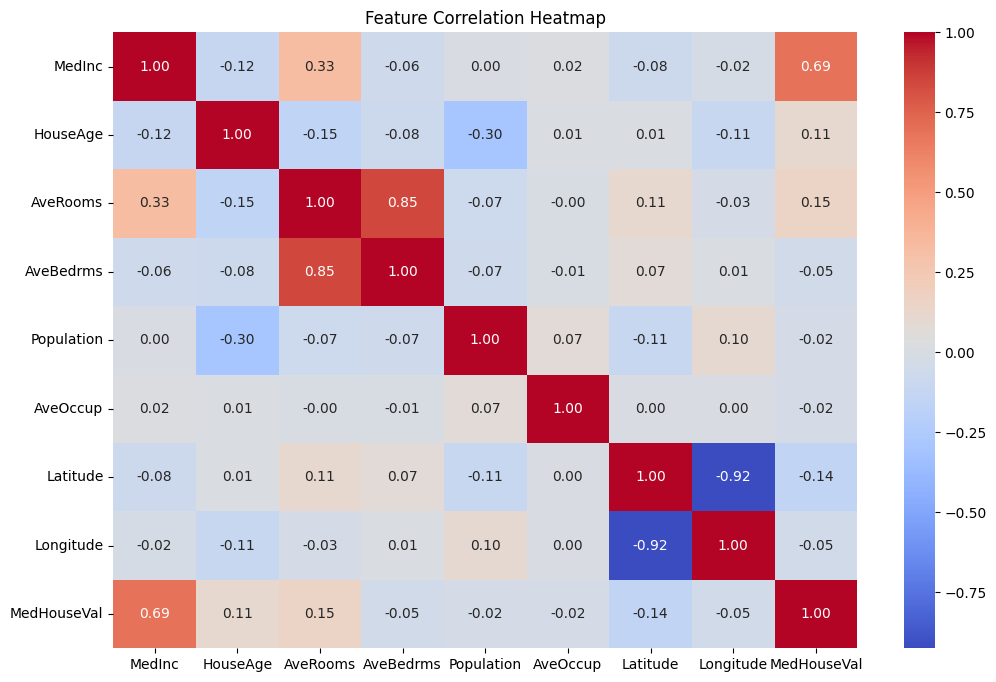

In [8]:
# Correlation visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

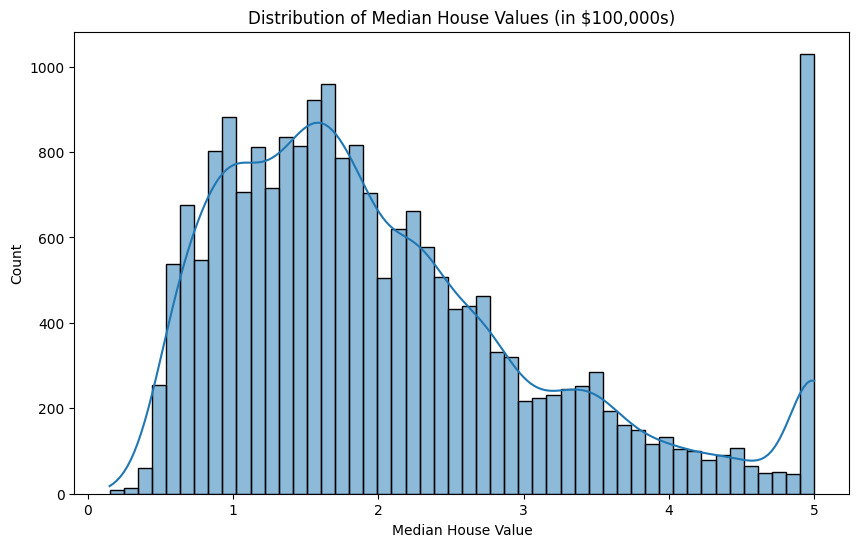

In [9]:
# Histogram of Median House Value
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Values (in $100,000s)')
plt.xlabel('Median House Value')
plt.show()

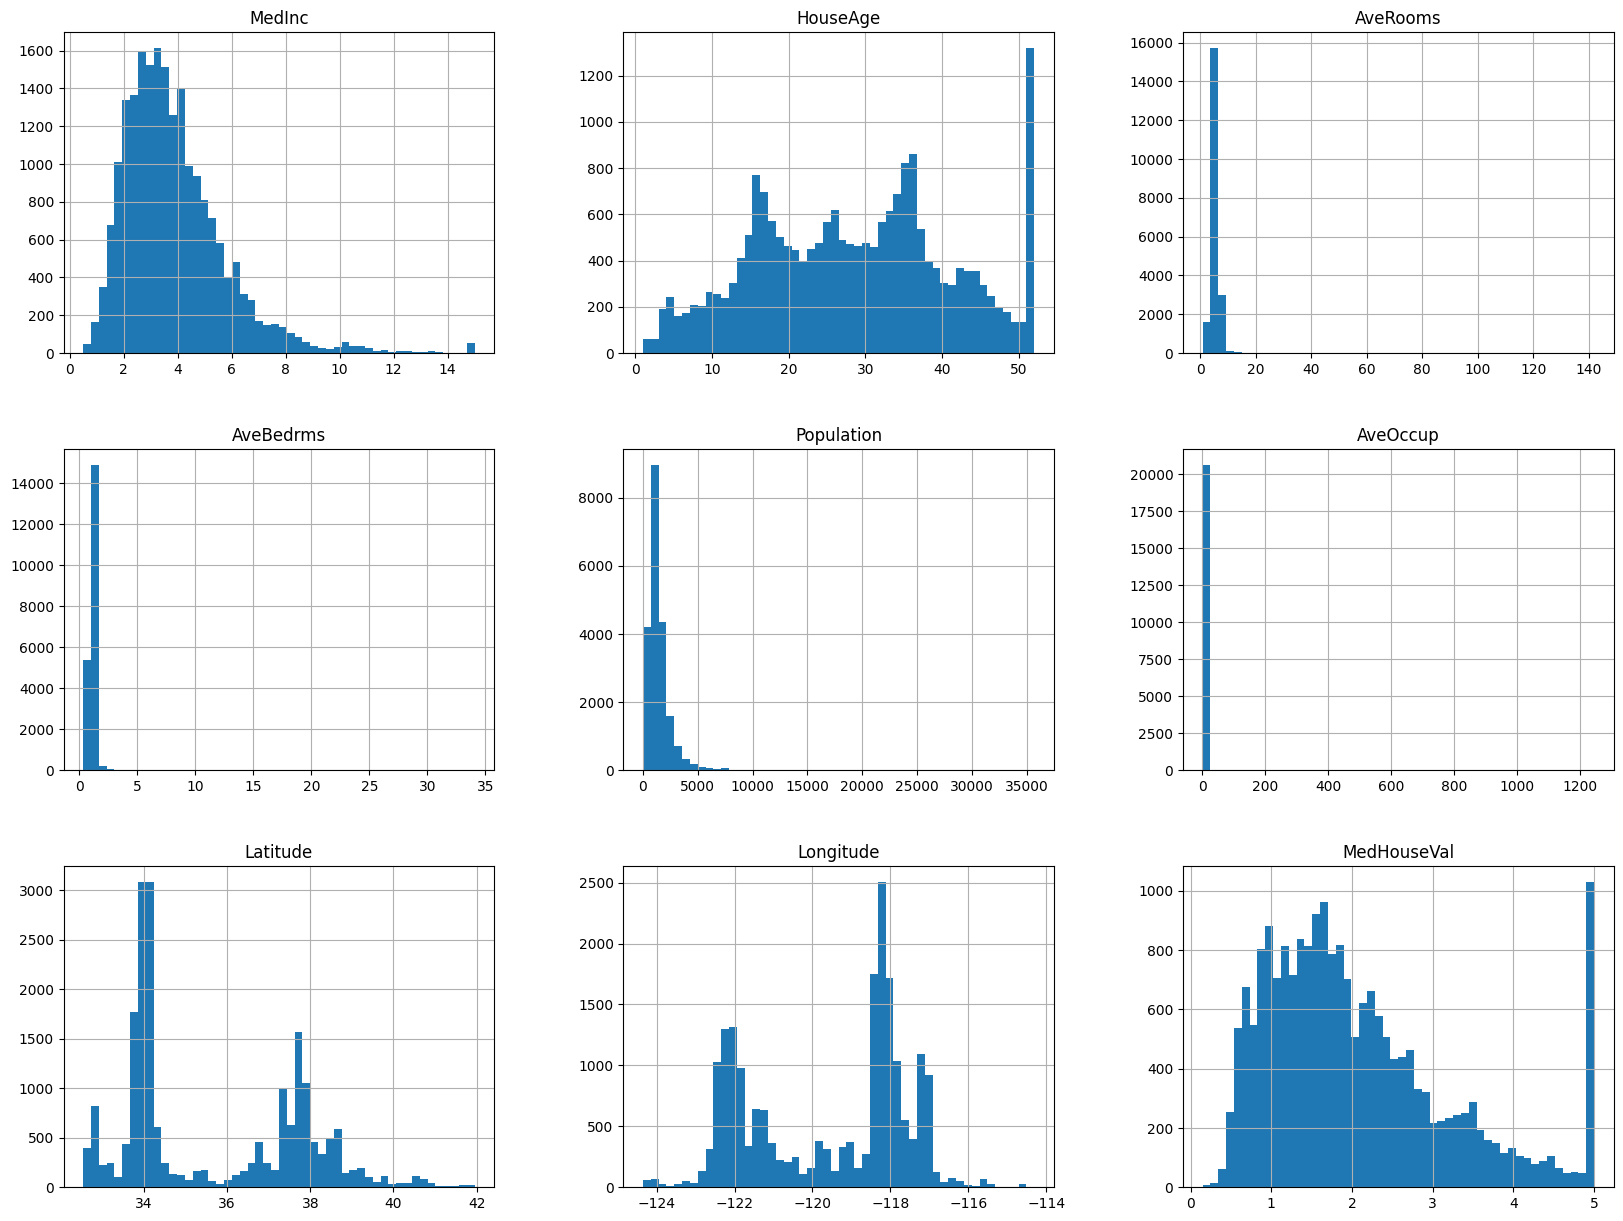

In [10]:
# Histograms of all Features to show distribution 
df.hist(bins=50, figsize=(20, 15))
plt.show()

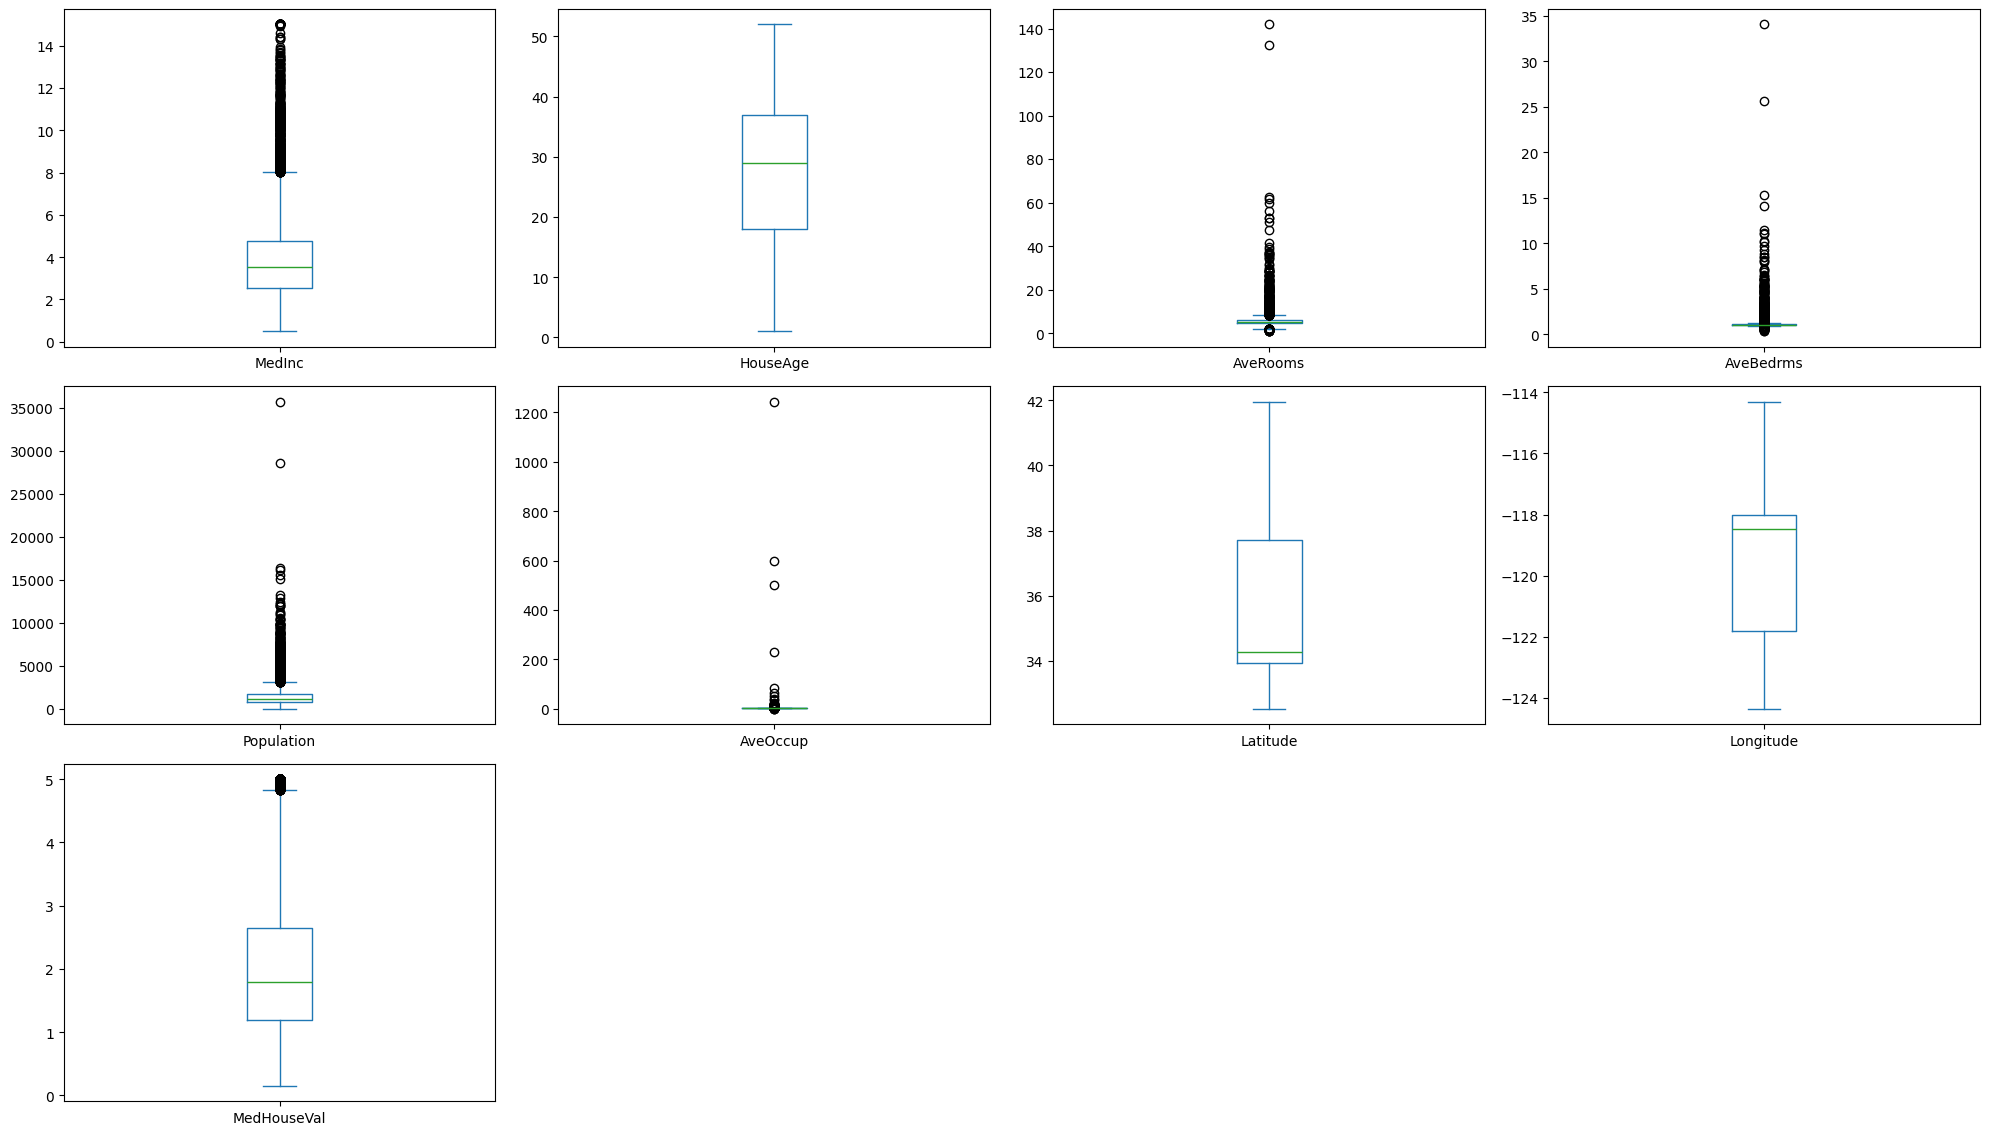

In [11]:
# Boxplots of all features to visualise outliers
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(20, 15), sharey=False)

plt.tight_layout() 
plt.show()

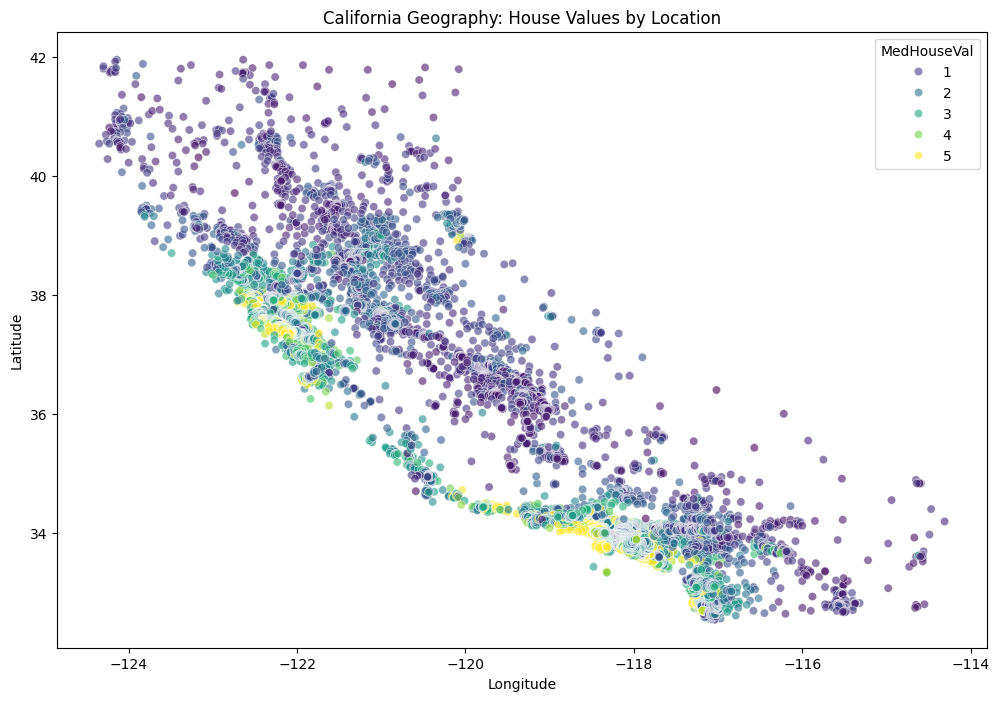

In [12]:
# Show distribution within CA by house value
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='MedHouseVal', 
                palette='viridis', alpha=0.6)
plt.title('California Geography: House Values by Location')
plt.show()

#### Preprocessing

In [13]:
# Import necessary additional libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import joblib  # For saving the pipeline

In [14]:
# Feature Selection 
features = ['MedInc', 'AveRooms', 'HouseAge', 'Latitude', 'Longitude']
X = df[features]
y = df['MedHouseVal']

In [15]:
# Split data into train, validation, test (70% train, 15% val, 15% test)
# Split before scaling (pipeline will handle scaling during fit) 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (14448, 5), Val shape: (3096, 5), Test shape: (3096, 5)


In [16]:
# Clipping at 1st and 99th percentiles to handle outliers
features_to_clip = ['MedInc', 'AveRooms']

for col in features_to_clip:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    
    # Apply clipping
    df[col] = df[col].clip(lower=lower, upper=upper)
    
    print(f"Clipped {col}:")
    print(f"  - New min: {df[col].min():.4f} (was {df[col].min():.4f} originally, clipped to {lower:.4f})")
    print(f"  - New max: {df[col].max():.4f} (was {df[col].max():.4f} originally, clipped to {upper:.4f})")
    print(f"  - Rows changed: {(df[col] != df[col].clip(lower=lower, upper=upper)).sum()}")  # Optional: count affected rows

Clipped MedInc:
  - New min: 1.0696 (was 1.0696 originally, clipped to 1.0696)
  - New max: 10.5965 (was 10.5965 originally, clipped to 10.5965)
  - Rows changed: 0
Clipped AveRooms:
  - New min: 2.5811 (was 2.5811 originally, clipped to 2.5811)
  - New max: 10.3570 (was 10.3570 originally, clipped to 10.3570)
  - Rows changed: 0


#### Modeling and Evaluation

In [17]:
# Create Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('model', LinearRegression())  # Linear Regression model
])
# Train the pipeline on training data
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


In [20]:
# Training set metrics
y_train_pred = pipeline.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training   → MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")

Training   → MSE: 0.5423, RMSE: 0.7364, R²: 0.5952


In [18]:
# Evaluate Performance on validation set
y_val_pred = pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")

Validation MSE: 0.5567, RMSE: 0.7461, R²: 0.5727


In [19]:
# Evaluate Performance on test se
y_test_pred = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

Test MSE: 0.5068, RMSE: 0.7119, R²: 0.6167


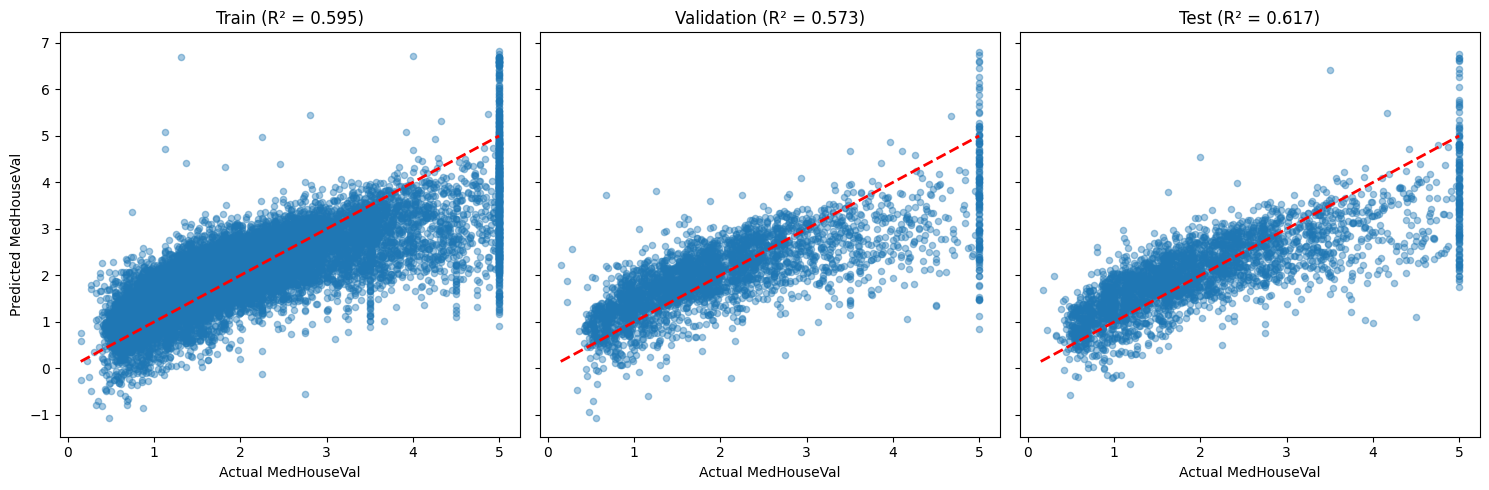

In [21]:
# Scaterplot of Predicted vs Actual (for train, val, test)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Train
axes[0].scatter(y_train, y_train_pred, alpha=0.4, s=20)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_title(f'Train (R² = {train_r2:.3f})')
axes[0].set_xlabel('Actual MedHouseVal')
axes[0].set_ylabel('Predicted MedHouseVal')

# Validation
axes[1].scatter(y_val, y_val_pred, alpha=0.4, s=20)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1].set_title(f'Validation (R² = {val_r2:.3f})')
axes[1].set_xlabel('Actual MedHouseVal')

# Test
axes[2].scatter(y_test, y_test_pred, alpha=0.4, s=20)
axes[2].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[2].set_title(f'Test (R² = {test_r2:.3f})')
axes[2].set_xlabel('Actual MedHouseVal')

plt.tight_layout()
plt.show()

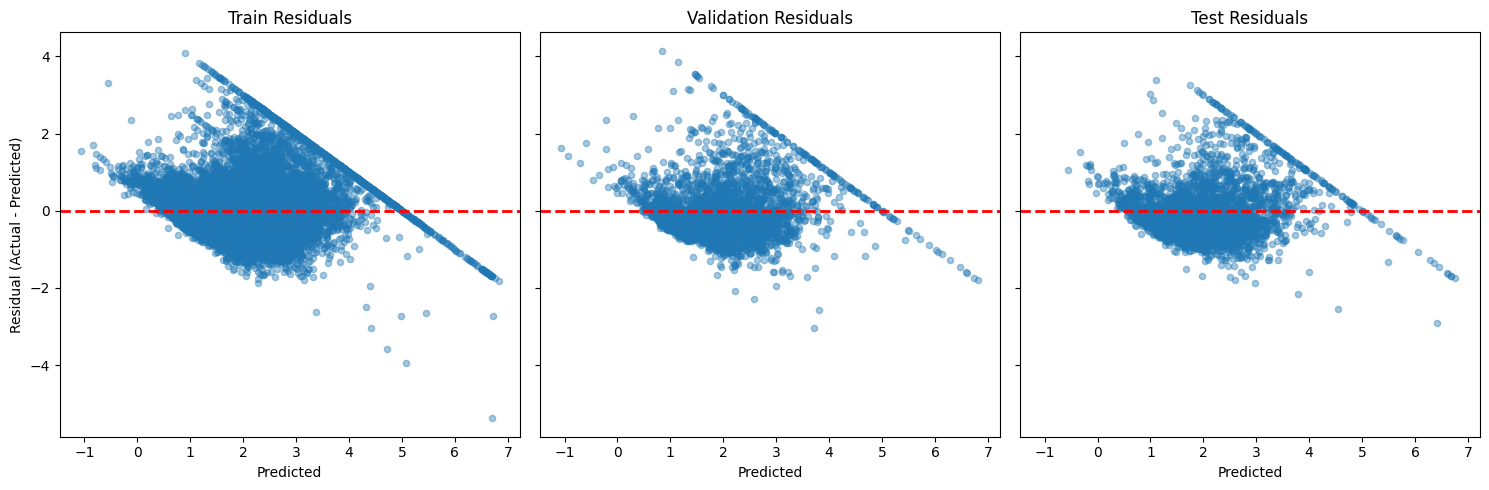

In [22]:
# Residuals = actual - predicted (for train, val, test)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# Train residuals
axes[0].scatter(y_train_pred, y_train - y_train_pred, alpha=0.4, s=20)
axes[0].axhline(0, color='r', linestyle='--', lw=2)
axes[0].set_title('Train Residuals')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Residual (Actual - Predicted)')

# Val
axes[1].scatter(y_val_pred, y_val - y_val_pred, alpha=0.4, s=20)
axes[1].axhline(0, color='r', linestyle='--', lw=2)
axes[1].set_title('Validation Residuals')
axes[1].set_xlabel('Predicted')

# Test
axes[2].scatter(y_test_pred, y_test - y_test_pred, alpha=0.4, s=20)
axes[2].axhline(0, color='r', linestyle='--', lw=2)
axes[2].set_title('Test Residuals')
axes[2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

In [23]:
# Save the pipeline as a single .pkl file
joblib.dump(pipeline, 'ca_housing_pipeline.pkl')
print("Pipeline saved as 'ca_housing_pipeline.pkl'")

Pipeline saved as 'ca_housing_pipeline.pkl'


### Final Model Performance Summary

Linear regression pipeline (features: MedInc, AveRooms, HouseAge, Latitude, Longitude):

- **Training**   → RMSE: 0.7364 | R²: 0.5952  
- **Validation** → RMSE: 0.7461 | R²: 0.5727  
- **Test**       → RMSE: 0.7119 | R²: 0.6167  

The model explains ~57–62% of variance with prediction errors of ~\\$71k–$75k. While not the highest possible accuracy (advanced models reach R² > 0.80), these results are sufficient for this project, where the primary focus is building and demonstrating a reproducible CI/CD pipeline (GitHub → Docker → Flask → Heroku → AWS EC2 with Nginx), rather than optimizing ML performance.